<a href="https://colab.research.google.com/github/RockyKanoa/Data-Science-Tutorials/blob/master/Hamoye_Stage_C_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import math
%matplotlib inline

print('packages/libraries imported')

packages/libraries imported


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv',error_bad_lines=False)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
df.drop('stab',inplace=True,axis=1)

In [4]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [5]:
#split data into independent variables and target variable
X=df.drop('stabf',axis=1)
y=df.stabf

In [6]:
X.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923


In [7]:
y.head()

0    unstable
1      stable
2    unstable
3    unstable
4    unstable
Name: stabf, dtype: object

In [8]:
#split data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [9]:
#standardise the dataset
#note that y is not standardised as it is a categorical, binary feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_trainscaled = scaler.transform(x_train)

In [10]:
x_testscaled = scaler.transform(x_test)

In [11]:
x_trainscaled1 = pd.DataFrame(x_trainscaled, columns=x_train.columns)
x_testscaled1 = pd.DataFrame(x_testscaled, columns=x_test.columns)

#Random Forest Classifier Ensemble Model and Evaluation

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)

In [13]:
rfc.fit(x_trainscaled1, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [14]:
rfc_pred=rfc.predict(x_testscaled1)

In [15]:
y_test.unique()

array(['unstable', 'stable'], dtype=object)

In [16]:
#from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
#cnf_mat = confusion_matrix(y_test, rfc_pred, labels=['unstable','stable'])
#cnf_mat

In [17]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
cnf_mat = confusion_matrix(y_test, rfc_pred)
cnf_mat

array([[ 625,   87],
       [  55, 1233]])

In [18]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, classification_report

In [19]:
print(classification_report(y_test,rfc_pred,digits=4))

              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



In [20]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, classification_report

In [21]:
accuracy = accuracy_score(y_test, rfc_pred)
print('Accuracy: {}'.format(round(accuracy*100),2))

Accuracy: 93.0


In [22]:
recall = recall_score(y_test, rfc_pred, pos_label='stable')
print('Recall: {}'.format(round(recall*100),2))

Recall: 88.0


In [23]:
precision = precision_score(y_test, rfc_pred, pos_label='stable')
print('Precision: {}'.format(round(precision*100),2))

Precision: 92.0


In [24]:
f1 = f1_score(y_test, rfc_pred, pos_label='stable')
print('F1: {}'.format(round(f1*100),2))

F1: 90.0


#Extra Trees Classifier Ensemble Model and Evaluation




In [63]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=1)

In [64]:
etc.fit(x_trainscaled1,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

In [67]:
Extra=etc.fit(x_trainscaled1,y_train)

Feature: 0, Score: 0.11740
Feature: 1, Score: 0.11844
Feature: 2, Score: 0.11317
Feature: 3, Score: 0.11547
Feature: 4, Score: 0.03951
Feature: 5, Score: 0.04037
Feature: 6, Score: 0.04071
Feature: 7, Score: 0.04058
Feature: 8, Score: 0.08978
Feature: 9, Score: 0.09368
Feature: 10, Score: 0.09688
Feature: 11, Score: 0.09402


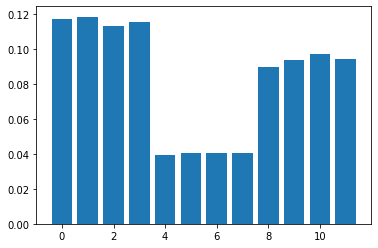

In [68]:
# get importance
importance = Extra.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [27]:
etc_pred=etc.predict(x_testscaled1)

In [28]:
print(classification_report(y_test,etc_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9410    0.8511    0.8938       712
    unstable     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000



In [29]:
cnf_mat1= confusion_matrix(y_test,etc_pred)
cnf_mat1

array([[ 606,  106],
       [  38, 1250]])

In [30]:
accuracy1= accuracy_score(y_test,etc_pred)
print('Accuracy1: {}'.format(round(accuracy1*100),2))

Accuracy1: 93.0


In [31]:
precision1= precision_score(y_test,etc_pred, pos_label='stable')
print('Precision1: {}'.format(round(precision1*100),2))

Precision1: 94.0


In [32]:
recall1= recall_score(y_test,etc_pred, pos_label='stable')
print('Recall1: {}'.format(round(recall1*100),2))

Recall1: 85.0


In [33]:
f11= f1_score(y_test,etc_pred, pos_label='stable')
print('F11: {}'.format(round(f11*100),2))

F11: 89.0



#XGBoost Classifier Ensemble Model and Evaluation

In [34]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)

In [35]:
xgb.fit(x_trainscaled1,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [36]:
xgb_pred = xgb.predict(x_testscaled1)

In [37]:
print(classification_report(y_test,xgb_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9206    0.8469    0.8822       712
    unstable     0.9190    0.9596    0.9389      1288

    accuracy                         0.9195      2000
   macro avg     0.9198    0.9033    0.9105      2000
weighted avg     0.9195    0.9195    0.9187      2000



In [38]:
cnf_mat2 = confusion_matrix(y_test,xgb_pred)
cnf_mat2

array([[ 603,  109],
       [  52, 1236]])

In [39]:
accuracy2= accuracy_score(y_test,xgb_pred)
print('Accuracy2: {}'.format(round(accuracy2*100),2))

Accuracy2: 92.0


In [40]:
precision2= precision_score(y_test,xgb_pred, pos_label='stable')
print('Precision2: {}'.format(round(precision2*100),2))

Precision2: 92.0


In [41]:
recall2= recall_score(y_test,xgb_pred, pos_label='stable')
print('Recall2: {}'.format(round(recall2*100),2))

Recall2: 85.0


In [42]:
f12= f1_score(y_test,xgb_pred, pos_label='stable')
print('F12: {}'.format(round(f12*100),2))

F12: 88.0


#Light GBM Classifier and Evaluation

In [43]:
from lightgbm import LGBMClassifier

LGBM=LGBMClassifier(random_state=1)

In [44]:
LGBM.fit(x_trainscaled1, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [45]:
LGBM_pred = LGBM.predict(x_testscaled1)

In [46]:
print(classification_report(y_test, LGBM_pred, digits=4))

              precision    recall  f1-score   support

      stable     0.9297    0.8919    0.9104       712
    unstable     0.9415    0.9627    0.9520      1288

    accuracy                         0.9375      2000
   macro avg     0.9356    0.9273    0.9312      2000
weighted avg     0.9373    0.9375    0.9372      2000



In [47]:
cnf_mat3 = confusion_matrix(y_test,LGBM_pred)
cnf_mat3

array([[ 635,   77],
       [  48, 1240]])

In [48]:
accuracy3 = accuracy_score(y_test,LGBM_pred)
print('Accuracy3: {}'.format(round(accuracy3*100),2))

Accuracy3: 94.0


In [49]:
precision3 = precision_score(y_test,LGBM_pred,pos_label='stable')
print('Precision3: {}'.format(round(precision3*100),2))

Precision3: 93.0


In [50]:
recall3 = recall_score(y_test,LGBM_pred,pos_label='stable')
print('Recall3: {}'.format(round(recall3*100),2))

Recall3: 89.0


In [51]:
f13 = f1_score(y_test,LGBM_pred,pos_label='stable')
print('F13: {}'.format(round(f13*100),2))

F13: 91.0


#Randomised Search CV (Optimisation)

In [52]:
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

In [53]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [54]:
Randommodel2=RandomizedSearchCV(ExtraTreesClassifier(random_state=1),hyperparameter_grid, random_state=1, cv=5, verbose=1, scoring='accuracy', n_jobs=-1, n_iter=10).fit(x_trainscaled1,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


In [55]:
ETC_predsearch=Randommodel2.predict(x_testscaled1)

In [56]:
print(classification_report(y_test,ETC_predsearch,digits=4))

              precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



In [57]:
Randommodel2.best_params_

{'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [58]:
accuracy5= accuracy_score(y_test,ETC_predsearch)
print('Accuracy5: {}'.format(round(accuracy5*100),2))

Accuracy5: 93.0
